
**<h1><span style="color:red"><u>Fraud</u></span></h1>**
**Réalisé par : Toullec Nastassia, Marie Stéphanie et Abdelaziz Sayad**

### <span style="color:yellow"> 0. Importation des librairies</span> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <span style="color:red"> I. Audit des données</span> 

Le jeu de données que nous allons utiliser, recense diverses caractéristiques d'utilisateurs et leur transactions.
Le but de notre audit est de predire si une transaction est fraudeuse.

Le dataset comporte <strong>11 colonnes</strong>, pour environ <strong>151113 lignes</strong>.
Les variables sont les suivantes :

- <strong>user_id</strong>	identifiant d'utilisateur
- <strong>signup_time</strong>	heure de connexion
- <strong>purchase_time</strong>	heure d'achat
- <strong>purchase_value</strong>	montant de la transaction
- <strong>device_id</strong>	identifiant du moyen de connexion
- <strong>source</strong>	moyen d'accés au site
- <strong>browser</strong>	navigateur utilisé
- <strong>sex</strong>	sexe
- <strong>age</strong>	age
- <strong>ip_adress</strong>	adresse IP de l'utilisateur
- <strong>is_fraud</strong>	variable cible: identifiant de la fraud

Le jeu de données qui nous intéresse ici contient dix variables explicatives.
La variable expliquée est <strong>is_fraud</strong> soit 0 non frauduleux et des 1 pour frauduleux . 
La problématique est la clasification avec apprentissage supervisé.

### <span style="color:blue"> **A. Exploration un jeu de données**</span> 

<span style="color:green"> **1. Chargement des données**</span> 

Nous chargeons les données et affichons les premières lignes.

In [5]:
df = pd.read_csv(filepath_or_buffer = 'fraud.csv',
                           sep = ',',
                           header = 0)
df.head(10)                    

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 6:03:03,2015-07-09 8:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 3:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 7:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


<span style="color:green"> **2. Nettoyage du jeu de données**</span> 

<strong>Nous recréons les variables temporelles pour analyser la temporalité des données.</strong>

1/ Les variables signup_time et purchase_time, sont divisées chacune par date et heure, nous permettant de créer 4 variables supplémentaires :
<ul>
    <li>signup_day</li>
    <li>signup_time</li>
    <li>purchase_day</li>
    <li>purshase_time</li>
</ul>

In [6]:
#Les variables signup_time et purchase_time se composent des dates avec les heures, 
#pour mieux visualiser ces donnés on va les séparer
df['signup_day'] = df['signup_time'].apply(lambda time: time.split( )[0])
df['signup_time'] = df['signup_time'].apply(lambda time: time.split( )[1])
df['purchase_day'] = df['purchase_time'].apply(lambda time: time.split( )[0])
df['purchase_time'] = df['purchase_time'].apply(lambda time: time.split( )[1]) 

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,signup_day,purchase_day
0,22058,22:55:49,2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2015-02-24,2015-04-18
1,333320,20:39:50,1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,2015-06-07,2015-06-08
2,1359,18:52:44,18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2015-01-01,2015-01-01
3,150084,21:13:25,13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,2015-04-28,2015-05-04
4,221365,7:09:52,18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,2015-07-21,2015-09-09


2/ puis nous divisons chacune des variables signup_day et purchase_day en 3 variables distinctes.
Ainsi la date de connexion se compose de :
<ul>
    <li>signup_day</li>
    <li>signup_month</li>
    <li>signup_year</li>
</ul> 

Pour la date d'achat : 

<ul>
    <li>purchase_day</li>
    <li>purchase_month</li>
    <li>purchase_year</li>
</ul> 

Cette ventilation nous permettra d'analyser et détecter les tendances des transactions dans le temps.

In [7]:
df['signup_year'] = df['signup_day'].apply(lambda date: date.split('-')[0])
df['signup_month'] = df['signup_day'].apply(lambda date: date.split('-')[1])
df['signup_day'] = df['signup_day'].apply(lambda date: date.split('-')[2])


df['purchase_year'] = df['purchase_day'].apply(lambda date: date.split('-')[0])
df['purchase_month'] = df['purchase_day'].apply(lambda date: date.split('-')[1])
df['purchase_day'] = df['purchase_day'].apply(lambda date: date.split('-')[2])

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,signup_day,purchase_day,signup_year,signup_month,purchase_year,purchase_month
0,22058,22:55:49,2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,24,18,2015,02,2015,04
1,333320,20:39:50,1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,07,08,2015,06,2015,06
2,1359,18:52:44,18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,01,01,2015,01,2015,01
3,150084,21:13:25,13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,28,04,2015,04,2015,05
4,221365,7:09:52,18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,21,09,2015,07,2015,09


Nous mettons les variables dans l'ordre pour une meilleure lecture.

In [8]:
df = df[['user_id','signup_time','signup_day', 'signup_month', 'signup_year',
        'purchase_time','purchase_day', 'purchase_month', 'purchase_year','purchase_value',
        'device_id','source','browser','sex', 'age','ip_address','is_fraud']]


df.head()

,user_id,signup_time,signup_day,signup_month,signup_year,purchase_time,purchase_day,purchase_month,purchase_year,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,22:55:49,24,02,2015,2:47:11,18,04,2015,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,20:39:50,07,06,2015,1:38:54,08,06,2015,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,18:52:44,01,01,2015,18:52:45,01,01,2015,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,21:13:25,28,04,2015,13:54:50,04,05,2015,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,7:09:52,21,07,2015,18:40:53,09,09,2015,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


<strong>Nous vérifions les valeurs éventuellement manquantes.</strong>

In [ ]:
df.isna().sum() #affichez les valeurs manquantes
#Il n'y a pas de valeurs manquantes

Le jeu de données de contient pas de valeurs manquantes

<span style="color:green"> **3. Analyse descriptive des données**</span> 

Le jeu de données se compose ainsi : 

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   signup_day      151112 non-null  object 
 3   signup_month    151112 non-null  object 
 4   signup_year     151112 non-null  object 
 5   purchase_time   151112 non-null  object 
 6   purchase_day    151112 non-null  object 
 7   purchase_month  151112 non-null  object 
 8   purchase_year   151112 non-null  object 
 9   purchase_value  151112 non-null  int64  
 10  device_id       151112 non-null  object 
 11  source          151112 non-null  object 
 12  browser         151112 non-null  object 
 13  sex             151112 non-null  object 
 14  age             151112 non-null  int64  
 15  ip_address      151112 non-null  float64
 16  is_fraud        151112 non-null  int64  
dtypes: float64

<strong>Analyse descriptives des variables quantitatives</strong>

Les données numériques sont globalement distribuées de la façon suivantes : 

In [12]:
df.describe() #la distribution des données

,user_id,purchase_value,age,ip_address,is_fraud
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


Pour une analyse plus poussée, nous nous pencherons sur l'analyse descriptives des variables quantitatives <strong>age</strong> et <strong>purchase_value</strong>

In [17]:
num_data = df.select_dtypes(include=['int64'])

num_data

# analyse position ?

# analyse dispersion ?

# dépendance entre montant achat et age?

# TO DO relation en montant achat/age et variable is_fraud?

,user_id,purchase_value,age,is_fraud
0,22058,34,39,0
1,333320,16,53,0
2,1359,15,53,1
3,150084,44,41,0
4,221365,39,45,0
...,...,...,...,...
151107,345170,43,28,1
151108,274471,35,32,0
151109,368416,40,26,0
151110,207709,46,37,0


<strong>Analyse descriptives des variables qualitatives</strong>

In [22]:
cat_data  = df.select_dtypes(include = 'O')

cat_data['is_fraud'] = df['is_fraud']

cat_data

# Modalités les plus fréquentes des variables qualitatives (source, browser, sex) ?
# analyse quantiles variables qualitatives par rapport à la variable is_fraud?

/tmp/ipykernel_21524/668398117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['is_fraud'] = df['is_fraud']


,signup_time,signup_day,signup_month,signup_year,purchase_time,purchase_day,purchase_month,purchase_year,device_id,source,browser,sex,is_fraud
0,22:55:49,24,02,2015,2:47:11,18,04,2015,QVPSPJUOCKZAR,SEO,Chrome,M,0
1,20:39:50,07,06,2015,1:38:54,08,06,2015,EOGFQPIZPYXFZ,Ads,Chrome,F,0
2,18:52:44,01,01,2015,18:52:45,01,01,2015,YSSKYOSJHPPLJ,SEO,Opera,M,1
3,21:13:25,28,04,2015,13:54:50,04,05,2015,ATGTXKYKUDUQN,SEO,Safari,M,0
4,7:09:52,21,07,2015,18:40:53,09,09,2015,NAUITBZFJKHWW,Ads,Safari,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,3:03:34,27,01,2015,0:30:47,29,03,2015,XPSKTWGPWINLR,SEO,Chrome,M,1
151108,17:43:29,15,05,2015,12:24:39,26,05,2015,LYSFABUCPCGBA,SEO,Safari,M,0
151109,23:07:31,03,03,2015,7:07:47,20,05,2015,MEQHCSJUBRBFE,SEO,IE,F,0
151110,20:06:07,09,07,2015,9:34:46,07,09,2015,CMCXFGRHYSTVJ,SEO,Chrome,M,0


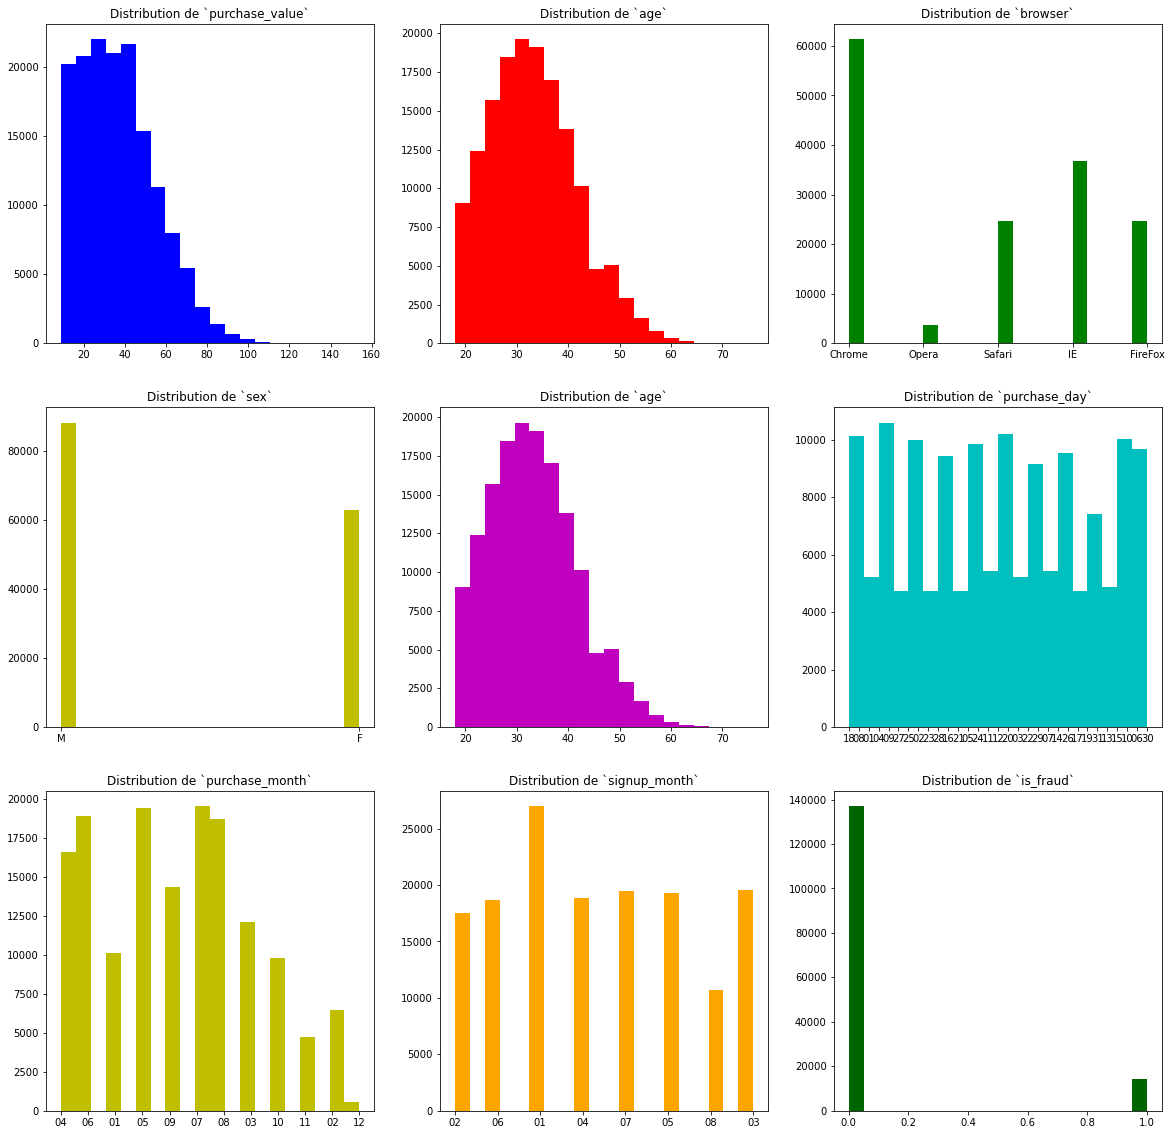

In [11]:
#Afficher des histogrammes pour mieux comprendre la distribution des données

##IL y a 2 l'histogramme age?

## pas compris ce que tu utilises comme données pour les axes ?

## comme vu ensemble, à voir à quel moment nous mettons en place l'over sampling ou l'undersampling?

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

axes[0][0].hist(df['purchase_value'], color='b', bins=20)
axes[0][0].set_title('Distribution de `purchase_value`')
axes[0][1].hist(df['age'], color='r', bins=20)
axes[0][1].set_title('Distribution de `age`')
axes[0][2].hist(df['browser'], color='g', bins=20)
axes[0][2].set_title('Distribution de `browser`')

axes[1][0].hist(df['sex'], color='y', bins=20)
axes[1][0].set_title('Distribution de `sex`')
axes[1][1].hist(df['age'], color='m', bins=20)
axes[1][1].set_title('Distribution de `age`')
axes[1][2].hist(df['purchase_day'], color='c', bins=20)
axes[1][2].set_title('Distribution de `purchase_day`')

axes[2][0].hist(df['purchase_month'], color='y', bins=20)
axes[2][0].set_title('Distribution de `purchase_month`')
axes[2][1].hist(df['signup_month'], color='orange', bins=20)
axes[2][1].set_title('Distribution de `signup_month`')
axes[2][2].hist(df['is_fraud'], color='darkgreen', bins=20)
axes[2][2].set_title('Distribution de `is_fraud`')

plt.show()



On peut constater que notre variable target 'is_fraud' est déséquilibrée, on va utiliser 2 methods pour resoudre cette probleme: oversampling et undersampling.